In [1]:
# =========================
#     2. IMPORTS
# =========================

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
# Remember, we'll avoid specifying colors or advanced styles to keep it simple.

# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# (Optional) XGBoost
!pip install xgboost
from xgboost import XGBClassifier

In [2]:
# =========================
#     3. DATA LOADING
# =========================

"""
Replace 'path/to/your_data.csv' with your actual data file or other 
data-reading method if you parse directly from XML.
"""

# Example: let's assume you have pre-processed your XML data into a CSV,
# each row representing a segment candidate or region with relevant features.

data = pd.read_csv('/Users/gavinl/Desktop/TANAP Segmentation/Data/Training/final_dataset_features.csv')
#data = data.drop("instruction",axis=1)
# Let’s peek at the data
print("Data Head:")
display(data.head())

print("\nData Info:")
display(data.info())

Data Head:


,output,has_any_regions,total_region_count,content_density_score,has_header_region,header_size_ratio,header_top_position,prev_page_has_signature,prev_page_emptiness,content_increase_from_prev,...,consistent_layout_with_neighbors,has_signature,signature_at_bottom,next_page_emptiness,content_decrease_to_next,bottom_region_is_final,is_structural_boundary,content_discontinuity_score,regions_vs_document_avg,is_outlier_in_sequence
0,NONE,1,4,0.001519,1,0.781771,0.054163,0,0.000000,0.0,...,0.0,0,0,1.0,1.0,0,0,0.0,0.380133,0
1,NONE,0,0,0.000000,0,0.000000,0.000000,0,0.998481,0.0,...,0.0,0,0,1.0,0.0,0,1,1.0,0.000000,1
2,NONE,0,0,0.000000,0,0.000000,0.000000,0,1.000000,0.0,...,0.0,0,0,1.0,0.0,0,1,1.0,0.000000,1
3,NONE,0,0,0.000000,0,0.000000,0.000000,0,1.000000,0.0,...,0.0,0,0,1.0,0.0,0,1,1.0,0.000000,1
4,NONE,0,0,0.000000,0,0.000000,0.000000,0,1.000000,0.0,...,0.0,0,0,1.0,0.0,0,1,1.0,0.000000,1



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8176 entries, 0 to 8175
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   output                            8176 non-null   object 
 1   has_any_regions                   8176 non-null   int64  
 2   total_region_count                8176 non-null   int64  
 3   content_density_score             8176 non-null   float64
 4   has_header_region                 8176 non-null   int64  
 5   header_size_ratio                 8176 non-null   float64
 6   header_top_position               8176 non-null   float64
 7   prev_page_has_signature           8176 non-null   int64  
 8   prev_page_emptiness               8176 non-null   float64
 9   content_increase_from_prev        8176 non-null   float64
 10  first_content_vertical_position   8176 non-null   float64
 11  paragraph_to_region_ratio         8176 non-null   float64

None

In [3]:
# =========================
#     4. FEATURE ENGINEERING
# =========================

"""
Here you would engineer/clean features or handle missing values.
- Example: Dropping rows with missing values (as a quick fix).
- Example: Encoding categorical variables if necessary.
Adjust this section based on your actual data structure.
"""

# Drop rows with NaN (if appropriate for your problem)
#data = data.dropna()

# Suppose you have some categorical columns that you want to one-hot encode
# data = pd.get_dummies(data, columns=['categorical_feature1', 'categorical_feature2'], drop_first=True)

print("Data after cleanup/encoding:")
display(data.head())

Data after cleanup/encoding:


,output,has_any_regions,total_region_count,content_density_score,has_header_region,header_size_ratio,header_top_position,prev_page_has_signature,prev_page_emptiness,content_increase_from_prev,...,consistent_layout_with_neighbors,has_signature,signature_at_bottom,next_page_emptiness,content_decrease_to_next,bottom_region_is_final,is_structural_boundary,content_discontinuity_score,regions_vs_document_avg,is_outlier_in_sequence
0,NONE,1,4,0.001519,1,0.781771,0.054163,0,0.000000,0.0,...,0.0,0,0,1.0,1.0,0,0,0.0,0.380133,0
1,NONE,0,0,0.000000,0,0.000000,0.000000,0,0.998481,0.0,...,0.0,0,0,1.0,0.0,0,1,1.0,0.000000,1
2,NONE,0,0,0.000000,0,0.000000,0.000000,0,1.000000,0.0,...,0.0,0,0,1.0,0.0,0,1,1.0,0.000000,1
3,NONE,0,0,0.000000,0,0.000000,0.000000,0,1.000000,0.0,...,0.0,0,0,1.0,0.0,0,1,1.0,0.000000,1
4,NONE,0,0,0.000000,0,0.000000,0.000000,0,1.000000,0.0,...,0.0,0,0,1.0,0.0,0,1,1.0,0.000000,1


In [4]:
# =========================
#     5. DEFINE FEATURES (X) AND TARGET (y)
# =========================

"""
In a typical segmentation-boundary classification setup, y might be binary 
(1 = is a boundary, 0 = not a boundary) or multi-class if you have multiple types of boundaries.

Let's assume a binary classification in this example:
"""

# Replace 'is_boundary' with the actual name of your target column
target_column = 'output'

# Separate into features and target
X = data.drop(columns=[target_column],axis=1)
y = data[target_column]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (8176, 25)
Target vector shape: (8176,)


In [5]:
y.head()

0    NONE
1    NONE
2    NONE
3    NONE
4    NONE
Name: output, dtype: object

In [6]:
# =========================
#     6. SPLIT DATA INTO TRAIN & TEST
# =========================

# Load the new test dataset that has the same format as the original data
# Replace with your actual path
new_test_data = pd.read_csv('/Users/gavinl/Desktop/TANAP Segmentation/Data/Testing/test_set_features.csv')

# Verify that the new test data has the same structure as the original data
print("New test dataset shape:", new_test_data.shape)
print("New test dataset features:")
display(new_test_data.head())

# Separate features and target in the new test dataset
X_test = new_test_data.drop(columns=[target_column], axis=1)
y_test = new_test_data[target_column]

# Verify new test set dimensions
print("External test feature matrix shape:", X_test.shape)
print("External test target vector shape:", y_test.shape)

# Optional: Create a validation set from the original data for hyperparameter tuning
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

New test dataset shape: (228, 26)
New test dataset features:


,output,has_any_regions,total_region_count,content_density_score,has_header_region,header_size_ratio,header_top_position,prev_page_has_signature,prev_page_emptiness,content_increase_from_prev,...,consistent_layout_with_neighbors,has_signature,signature_at_bottom,next_page_emptiness,content_decrease_to_next,bottom_region_is_final,is_structural_boundary,content_discontinuity_score,regions_vs_document_avg,is_outlier_in_sequence
0,NONE,0,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,...,0.000000,0,0,0.995204,0.000000,0,0,0.0,0.000000,1
1,NONE,1,9,0.004796,0,0.000000,0.000000,0,1.000000,1.000000,...,0.000000,0,0,0.936343,0.000000,1,1,1.0,1.620853,0
2,NONE,1,7,0.063657,1,0.027049,0.323360,0,0.995204,18.738165,...,0.000000,1,0,1.000000,1.000000,0,1,1.0,1.260664,0
3,NONE,0,0,0.000000,0,0.000000,0.000000,1,0.936343,0.000000,...,0.000000,0,0,0.607459,0.000000,0,1,1.0,0.000000,1
4,NONE,1,18,0.392541,1,0.000647,0.109513,0,1.000000,1.000000,...,0.166667,0,0,0.867881,0.736294,0,1,1.0,3.241706,1


External test feature matrix shape: (228, 25)
External test target vector shape: (228,)
Training set size: (6540, 25)
Validation set size: (1636, 25)


In [7]:
# =========================
#     7. TRAIN A CLASSIFIER
# =========================

"""
We'll use RandomForestClassifier as a powerful baseline. You can 
switch to XGBoostClassifier for potentially better performance, or 
tune parameters to refine performance.
"""

# 7.1: Define the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 7.2: Train the classifier on the training set
rf_clf.fit(X_train, y_train)

# 7.3: Evaluate on the validation set
y_val_pred = rf_clf.predict(X_val)
print("Classification Report (Random Forest on Validation Set):\n", classification_report(y_val, y_val_pred))

# 7.4: Confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix on Validation Set:")
print(cm_val)

Classification Report (Random Forest on Validation Set):
               precision    recall  f1-score   support

         END       0.83      0.69      0.75       139
      MIDDLE       0.92      0.96      0.94      1203
        NONE       0.85      0.79      0.82       155
       START       0.85      0.74      0.79       139

    accuracy                           0.90      1636
   macro avg       0.86      0.80      0.83      1636
weighted avg       0.90      0.90      0.90      1636

Confusion Matrix on Validation Set:
[[  96   39    1    3]
 [  19 1156   18   10]
 [   1   26  123    5]
 [   0   34    2  103]]


In [9]:
# =========================
#     8. HYPERPARAMETER TUNING
# =========================

"""
We can use GridSearchCV (or RandomizedSearchCV) to explore a range of
hyperparameters for better performance. Below is an example grid:
"""

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Instantiate the GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',   # or 'accuracy', 'f1_weighted', etc.
    cv=10,                 # 5-fold cross-validation
    verbose=1
)

# Fit the grid search on the full original dataset (for better use of data)
grid_search.fit(X, y)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.801878313265983


In [10]:
# =========================
#     9. TRAIN FINAL MODEL ON FULL DATASET
# =========================

# Train the final model on the entire original dataset
final_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
final_model.fit(X, y)


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)

In [11]:
# =========================
#     10. EVALUATE ON EXTERNAL TEST DATASET
# =========================

# Evaluate the final model on the external test dataset
y_test_pred = final_model.predict(X_test)
print("Classification Report (Final Model on External Test Data):\n", 
      classification_report(y_test, y_test_pred))

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on External Test Data:")
print(cm_test)

Classification Report (Final Model on External Test Data):
               precision    recall  f1-score   support

         END       0.92      0.58      0.71        19
      MIDDLE       0.91      1.00      0.96       150
        NONE       1.00      0.93      0.96        40
       START       0.87      0.68      0.76        19

    accuracy                           0.93       228
   macro avg       0.92      0.80      0.85       228
weighted avg       0.93      0.93      0.92       228

Confusion Matrix on External Test Data:
[[ 11   8   0   0]
 [  0 150   0   0]
 [  1   0  37   2]
 [  0   6   0  13]]


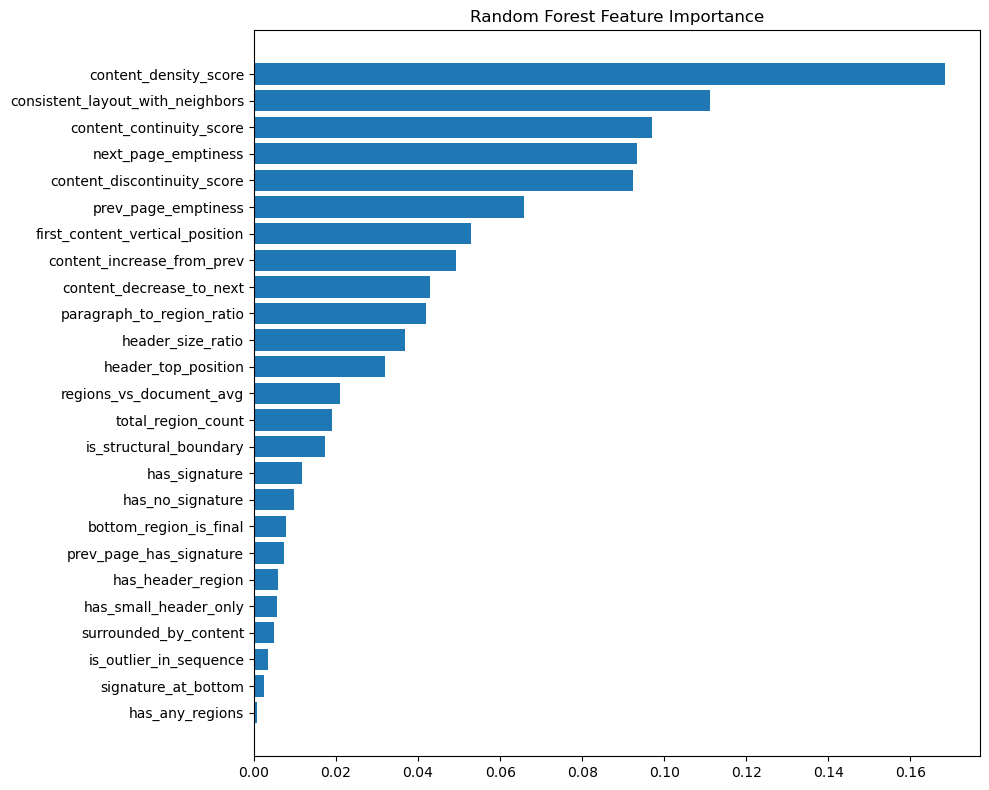

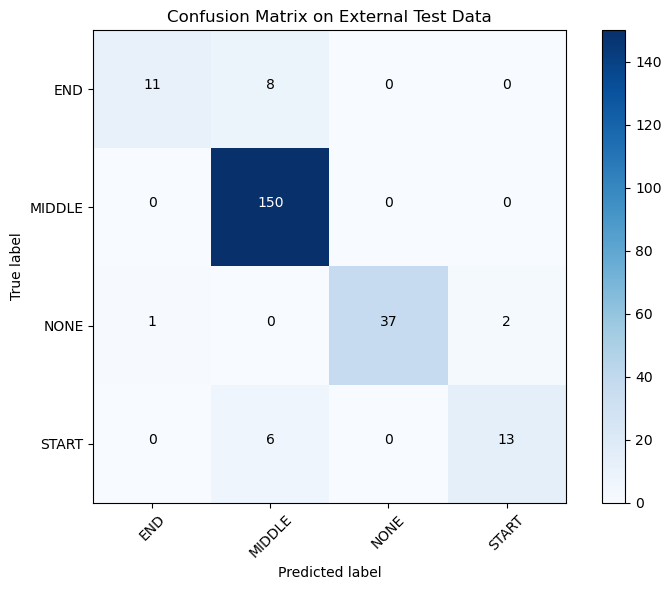

In [12]:
# =========================
#     11. VISUALIZATIONS
# =========================

"""
Depending on your data, you might want to visually inspect:
- The distribution of predicted boundaries
- Feature importance
- Confusion matrix heatmap
"""

# Example: Feature Importance for RandomForest
feature_importances = final_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix on External Test Data')
plt.colorbar()
classes = sorted(y_test.unique())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm_test.max() / 2.
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, format(cm_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [13]:
# =========================
#     12. SAVE THE MODEL (OPTIONAL)
# =========================

"""
You might want to save your final model for later use
"""
import joblib

# Save the model to a file
joblib.dump(final_model, 'random_forest_segmentation_model.pkl')
print("Model saved to 'random_forest_segmentation_model.pkl'")

# To load the model later:
# loaded_model = joblib.load('random_forest_segmentation_model.pkl

Model saved to 'random_forest_segmentation_model.pkl'
